## Assignment 1: 15-Arm Bandit Simulation

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
fixed_rewards= np.linspace(5,19,15)
fixed_rewards

array([  5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,
        16.,  17.,  18.,  19.])

In [3]:
prob_rewards = [np.random.normal(x) for x in fixed_rewards]

### Expected Reward:

Q<sub>n+1</sub> = Q<sub>n</sub> + 1/n(R<sub>n</sub>-Q<sub>n</sub>) <br>
Q<sub>0</sub>(a) = 5

In [4]:
Q_0 = 5

In [39]:
np.random.rand()

0.09601004911652311

In [138]:
def rewards(action,fixed=True):
    rewards = np.linspace(5,19,15)
    
    if fixed:
        return rewards[action]
    else:
        rewards = [np.random.normal(x) for x in fixed_rewards]
        return rewards[action]

In [145]:
rewards(2,False)

7.438074031060009

Q[i][action] = rewards(action)+(1/(i))*(rewards(action)-Q[i-1][action])

Iteration 1: 0
Q[i] = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5] 
Q[i] max: 5, action selected: 2
Iteration 1: 2000
Q[i] = [4.814599035425896, 4.437456927761738, 6.9952864994860855, 5, 5.011086922426653, 5.05256982212286, 5.003577114132781, 5.031981331028927, 5.053062347127107, 5.1474522351176635, 5.02146408308927, 5.037447462579503, 5, 5.044740075648976, 5.009174244521828] 
Q[i] max: 6.9952864994860855, action selected: 3
Iteration 1: 4000
Q[i] = [4.814599035425896, 4.438239764406267, 7.0153111547781695, 5, 5.012460305589032, 5.054821877803172, 5.003577114132781, 5.034225256967858, 5.053062347127107, 5.1474522351176635, 5.028597197838809, 5.04449865123437, 5.008894832624189, 5.05379960620251, 5.015552343959128] 
Q[i] max: 7.0153111547781695, action selected: 3


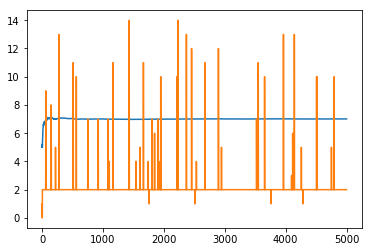

In [146]:
# Init
Q = {}
epsilon = 0.01
action_value = {}

for i in range(0,5000):
    if i == 0:
        Q[i] = [5 for i in range(0,15)]
        action = np.random.randint(1,15)
    else:
        Q[i][action] = Q[i-1][action]+(1/(i+1))*(rewards(action,False)-Q[i-1][action]) 
        #Q[i][action] = Q[i][action]+0.01*(rewards(action)-Q[i][action]) 
        #print(Q[i][action],(1/(i)),(rewards(action),Q[i][action])) 
        
        if np.random.rand() > epsilon:
            action = np.argmax(Q[i])
        else:
            action = np.random.randint(1,15)
        
    action_value[i] = [np.array(Q[i]).max(),action]
    if i%2000==0:
        print("Iteration {}: {}\nQ[i] = {} \nQ[i] max: {}, action selected: {}".format(1%10,
                i,Q[i],np.array(Q[i]).max(),action+1))
    Q[i+1] = Q[i]

plt.plot(list(action_value.values()))
plt.show()

In [147]:
action_value

{0: [5, 1],
 1: [5.0, 0],
 2: [5.2277419755587342, 0],
 3: [5.0, 2],
 4: [5.1931551567422929, 2],
 5: [5.3163632197126391, 2],
 6: [5.4615283646591681, 2],
 7: [5.4852991379266127, 2],
 8: [5.6815654476674933, 2],
 9: [5.7290409021353721, 2],
 10: [5.9899113795556094, 2],
 11: [6.1073898630970147, 2],
 12: [6.3070431900646495, 2],
 13: [6.3412531621289689, 2],
 14: [6.3445043386206068, 2],
 15: [6.3641950870411392, 2],
 16: [6.4507846001919367, 2],
 17: [6.4601793795802331, 2],
 18: [6.5224517475805719, 2],
 19: [6.524161035828385, 2],
 20: [6.6206243705554471, 2],
 21: [6.6331472777332063, 2],
 22: [6.5889746517433956, 2],
 23: [6.5517042066016176, 2],
 24: [6.6111399765914882, 2],
 25: [6.6139115274586064, 2],
 26: [6.6144327131096121, 2],
 27: [6.6121844067219842, 2],
 28: [6.6668338619586285, 2],
 29: [6.7010747468439078, 2],
 30: [6.7072441483848912, 2],
 31: [6.7231229247370985, 2],
 32: [6.7596693458157571, 2],
 33: [6.7878777309548131, 2],
 34: [6.7895310649321408, 2],
 35: [6.

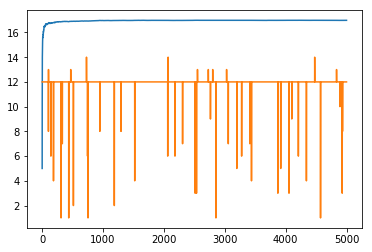

In [134]:
plt.plot(list(action_value.values()))
plt.show()